## Loading Libraries

In [5]:
import numpy as np
import os
import cv2
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Dataset and Preprocessing

In [10]:
# Paths to the dataset
dataset_path = r"C:\Users\X1 Carbon\Documents\animalData" # Replace with the actual path

# Classes
classes = ["cats", "dogs", "panda"]

# Image size
img_size = (32, 32)

# Function to load and preprocess images
def load_and_preprocess_images():
    data = []
    labels = []
    
    for idx, label in enumerate(classes):
        class_path = os.path.join(dataset_path, label)
        if not os.path.exists(class_path):
            raise FileNotFoundError(f"Directory not found: {class_path}")
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                img = cv2.resize(img, img_size)  # Resize image
                data.append(img.flatten())  # Flatten the image
                labels.append(idx)
            else:
                print(f"Warning: Could not load image {img_path}")

    return np.array(data), np.array(labels)

# Load and preprocess images
X, y = load_and_preprocess_images()
print(f"Loaded {len(X)} images.")

# Check if data is loaded
if X.size == 0:
    raise ValueError("No data loaded. Please check the dataset path and contents.")

Loaded 3000 images.


## Model Building and Evaluation:

In [13]:
# k-NN parameters
k_values = range(1, 16)
distance_metrics = ['manhattan', 'euclidean']

# 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Storing accuracy results
results = {metric: [] for metric in distance_metrics}

# Evaluate k-NN with different distance metrics
for distance in distance_metrics:
    for k in k_values:
        fold_accuracies = []
        
        for train_idx, test_idx in kf.split(X):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            
            # Initialize k-NN classifier
            knn = KNeighborsClassifier(n_neighbors=k, metric=distance)
            
            # Train the model
            knn.fit(X_train, y_train)
            
            # Predict
            y_pred = knn.predict(X_test)
            
            # Calculate accuracy
            fold_accuracies.append(accuracy_score(y_test, y_pred))
        
        # Store accuracies for each fold
        results[distance].append(fold_accuracies)

# Print out results
print("Cross-validation results:")
for distance, accuracies in results.items():
    print(f"Metric: {distance.capitalize()}")
    for k, accs in zip(k_values, accuracies):
        print(f"  k={k}: {accs}")


Cross-validation results:
Metric: Manhattan
  k=1: [0.45, 0.43666666666666665, 0.46166666666666667, 0.475, 0.45166666666666666]
  k=2: [0.43666666666666665, 0.4, 0.41833333333333333, 0.3933333333333333, 0.38333333333333336]
  k=3: [0.46, 0.4683333333333333, 0.45, 0.44333333333333336, 0.44333333333333336]
  k=4: [0.4816666666666667, 0.43666666666666665, 0.43666666666666665, 0.43833333333333335, 0.44]
  k=5: [0.455, 0.45666666666666667, 0.445, 0.445, 0.42833333333333334]
  k=6: [0.4633333333333333, 0.455, 0.43833333333333335, 0.46, 0.42833333333333334]
  k=7: [0.45666666666666667, 0.45666666666666667, 0.43666666666666665, 0.46166666666666667, 0.42833333333333334]
  k=8: [0.47833333333333333, 0.46, 0.43833333333333335, 0.45666666666666667, 0.43166666666666664]
  k=9: [0.495, 0.47, 0.43833333333333335, 0.4633333333333333, 0.45666666666666667]
  k=10: [0.475, 0.4716666666666667, 0.43333333333333335, 0.4633333333333333, 0.4483333333333333]
  k=11: [0.505, 0.46, 0.435, 0.4583333333333333, 0.4

## Results & Analysis

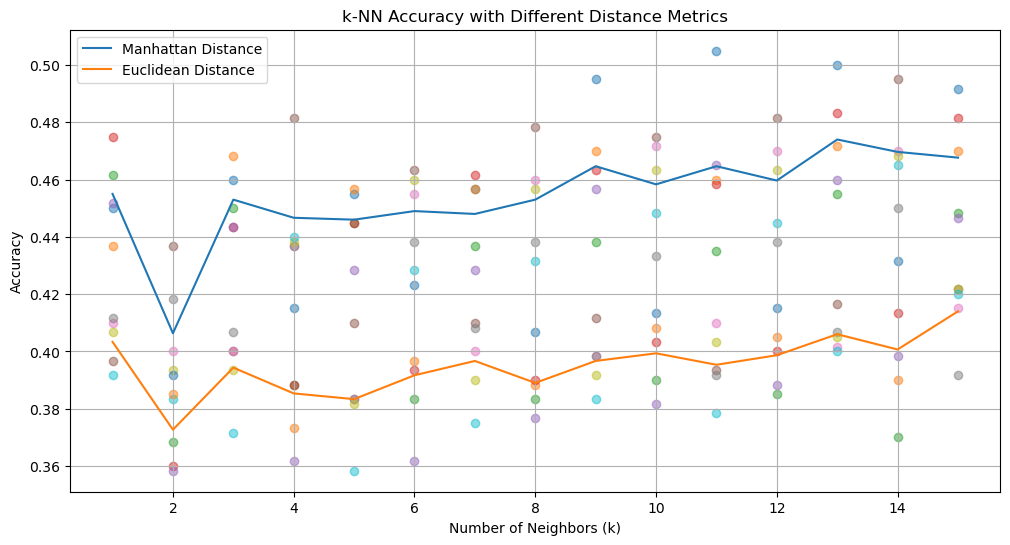

In [17]:
# Plotting the results with 5 points per k value
plt.figure(figsize=(12, 6))
for distance in distance_metrics:
    means = [np.mean(acc) for acc in results[distance]]
    plt.plot(k_values, means, label=f'{distance.capitalize()} Distance')
    for k, accs in zip(k_values, results[distance]):
        for acc in accs:
            plt.scatter(k, acc, alpha=0.5)

plt.title('k-NN Accuracy with Different Distance Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## Discussion

In [21]:
# Discussion: Choose the best k and metric based on average accuracy
best_metric = max(results, key=lambda x: max([np.mean(acc) for acc in results[x]]))
best_k = k_values[np.argmax([np.mean(acc) for acc in results[best_metric]])]

print(f"Best Metric: {best_metric.capitalize()}")
print(f"Best K: {best_k}")

# Training final model with the best metric and k
final_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
final_knn.fit(X, y)


Best Metric: Manhattan
Best K: 13


KNeighborsClassifier(metric='manhattan', n_neighbors=13)

## Top 5 predictions

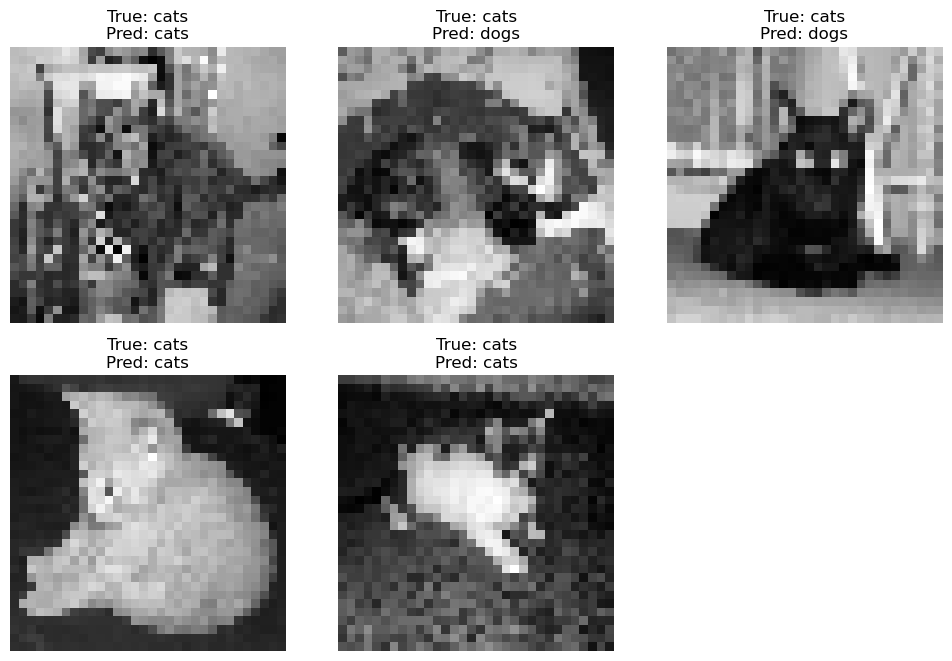

In [24]:
# Display the top 5 predictions
def display_top_5_predictions(model, X, y):
    plt.figure(figsize=(10, 10))
    for i in range(5):
        img = X[i].reshape(img_size)
        true_label = classes[y[i]]
        predicted_label = classes[model.predict([X[i]])[0]]
        
        plt.subplot(3, 3, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to display top 5 predictions
display_top_5_predictions(final_knn, X, y)
